In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt





/Users/sujithjulakanti/Desktop/Drone View/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:

# === CONFIG ===
MAPBOX_TOKEN = "pk.eyJ1Ijoic3VqaXRoaiIsImEiOiJjbWJ1aDBuc2EwY2p0MmtzMHBoejdiYXQwIn0.fqLiGN_s1XKcS-ZOCEwsxA"

In [ ]:
bbox = [77.6180, 12.9315, 77.6190, 12.9325]  # ~100m x 100m
# zoom =   # Closest you’ll get visually to 5cm/pixel


In [19]:

# Compute center and zoom manually or set fixed zoom
center_lon = (bbox[0] + bbox[2]) / 2
center_lat = (bbox[1] + bbox[3]) / 2
zoom = 17  # Good for building-level resolution (adjust 15–19)

# Image size (max 1280x1280 for free accounts)
width, height = 1024, 1024

In [17]:
# === Build URL ===
url = f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{center_lon},{center_lat},{zoom}/{width}x{height}?access_token={MAPBOX_TOKEN}"



Image saved as 'satellite_image.png'.


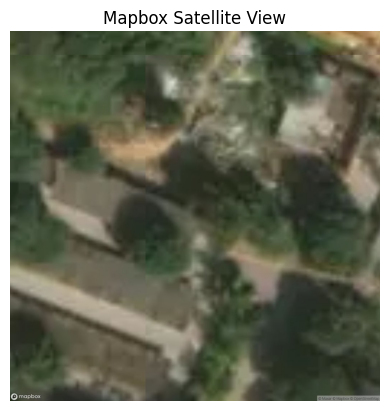

In [20]:
# === Fetch Image ===
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    img.save("satellite_image.png")
    print("Image saved as 'satellite_image.png'.")

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title("Mapbox Satellite View")
    plt.show()
else:
    print("Error fetching image:", response.status_code, response.text)